In [1]:
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
from pmdarima import auto_arima
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.pylab as plt

In [2]:
bitcoin_df = pd.read_csv('Resources/BTC/BTC-USD_Historical_Dec-11-2021.csv',index_col='Date', parse_dates= True)
bitcoin_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-01,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
2014-11-01,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2014-12-01,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700


In [3]:
bitcoin_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
bitcoin_df = bitcoin_df.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [5]:
bitcoin_df.head(10)

,Close
Date,
2014-10-01,338.321014
2014-11-01,378.046997
2014-12-01,320.192993
2015-01-01,217.464005
2015-02-01,254.263000
2015-03-01,244.223999
2015-04-01,236.145004
2015-05-01,230.190002
2015-06-01,263.071991


In [6]:
bitcoin_df.dtypes

Close    float64
dtype: object

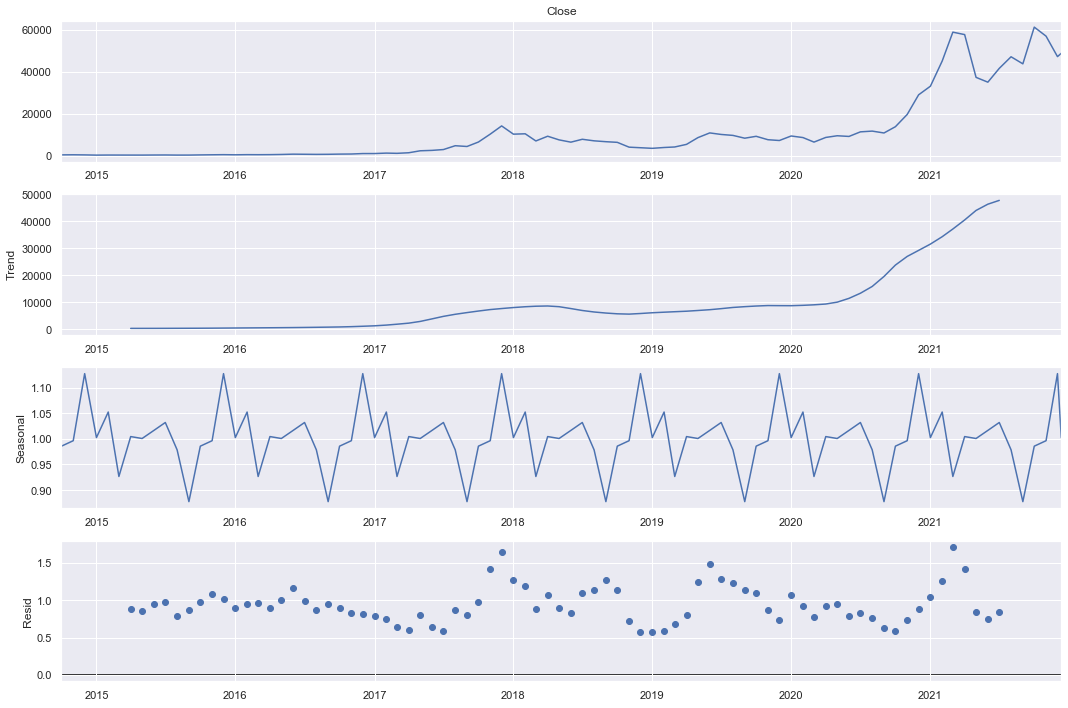

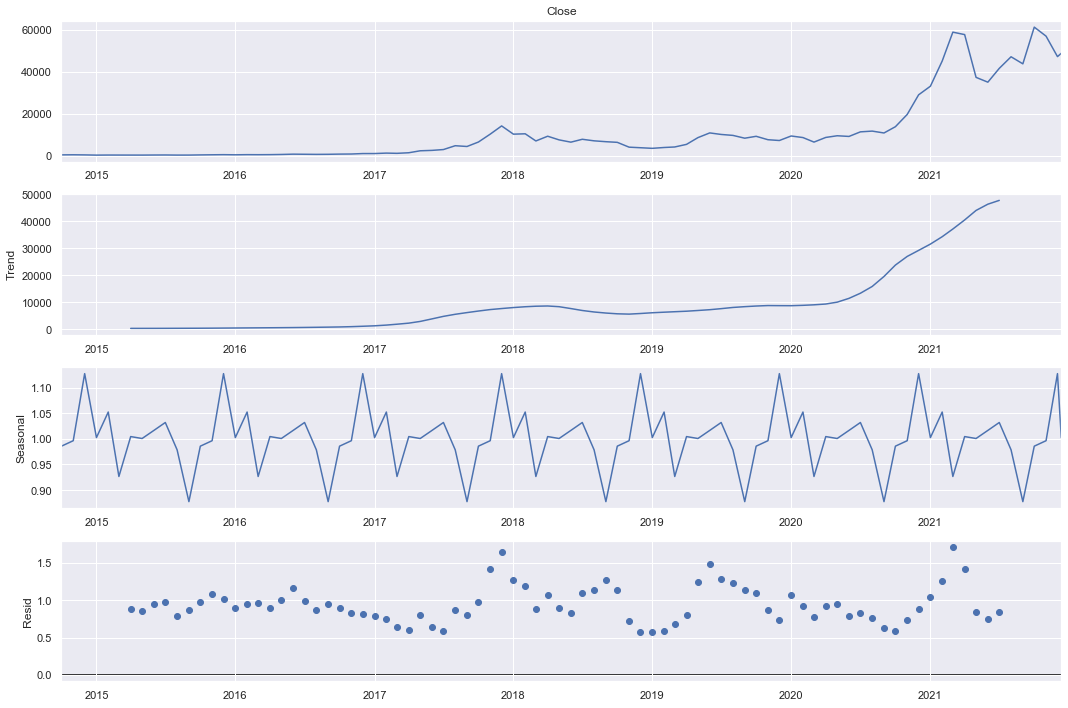

In [7]:
results = seasonal_decompose(bitcoin_df['Close'],model ='multiplicative',period=12)
plt.rcParams.update({'figure.figsize': (15,10)})
results.plot()

In [8]:
#Arima
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(bitcoin_df['Close'], start_p = 1, start_q = 1,
max_p = 3, max_q = 3, m = 12,
start_P = 0, seasonal = True,
d = None, D = 1, trace = True,
error_action ='ignore', # we don't want to know if an order does not work
suppress_warnings = True, # we don't want convergence warnings
stepwise = True)# set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1484.160, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1498.481, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1487.749, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1485.243, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1494.158, Time=0.03 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1485.503, Time=0.15 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1485.798, Time=0.15 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1484.470, Time=0.21 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1487.280, Time=0.24 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1487.939, Time=0.06 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1482.772, Time=0.25 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1492.981, Time=0.04 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1484.419, Time=0.19 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=1484.462, Time=0.22 sec
 ARIMA(2,1,1)(1,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   88
Model:             SARIMAX(2, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -735.046
Date:                                 Sat, 11 Dec 2021   AIC                           1480.091
Time:                                         12:59:38   BIC                           1491.678
Sample:                                              0   HQIC                          1484.718
                                                  - 88                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2935      0.093      3.163      0.002       0.112       0.475
ar.L2         -0.3192      0.067     -4.733      0.000      -0.451      -0.187
ma.S.L12      -0.8983      0.280     -3.206      0.001      -1.447      -0.349
ma.S.L24       0.3446      0.286      1.203      0.229      -0.217       0.906
sigma2      1.852e+07   1.45e+06     12.786      0.000    1.57e+07    2.14e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               181.21
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              58.67   Skew:                             0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
# Split data into train / test sets
train = bitcoin_df.iloc[:len(bitcoin_df)-12]
test = bitcoin_df.iloc[len(bitcoin_df)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Close'],
order = (0, 1, 1),
seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                   76
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -566.436
Date:                            Sat, 11 Dec 2021   AIC                           1142.871
Time:                                    12:59:39   BIC                           1153.587
Sample:                                10-01-2014   HQIC                          1147.086
                                     - 01-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3087      0.084      3.661      0.000       0.143       0.474
ar.S.L12      -0.5878      0.246     -2.393      0.017      -1.069      -0.106
ar.S.L24      -0.4360      0.201     -2.165      0.030      -0.831      -0.041
ma.S.L12      -0.3260      0.372     -0.877      0.380      -1.054       0.402
sigma2      3.467e+06   5.31e+05      6.525      0.000    2.43e+06    4.51e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 7.98
Prob(Q):                              0.76   Prob(JB):                         0.02
Heteroskedasticity (H):             116.24   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

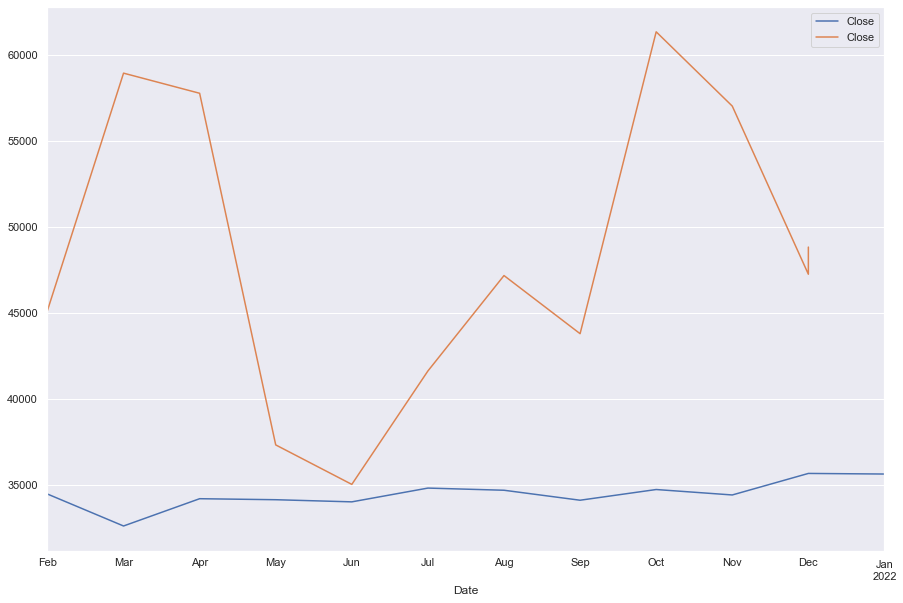

In [10]:
#Predictions of ARIMA Model agains the Test set
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,typ = 'levels').rename("Close")

# plot predictions and actual values
predictions.plot(legend = True)
test['Close'].plot(legend = True)


In [11]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Close"], predictions)

16301.533546102672

In [12]:
# Calculate mean squared error
mean_squared_error(test["Close"], predictions)

265739995.95471072

In [13]:
# Train the model on the full dataset
model = model = SARIMAX(bitcoin_df['Close'],order = (0, 1, 1),seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 20 years
forecast = result.predict(start = len(bitcoin_df),end = (len(bitcoin_df)-1) + 2 * 12,typ = 'levels').rename('Forecast')

# Plot the forecast values
bitcoin_df['Close'].plot(figsize = (25, 10), legend = True)
forecast.plot(legend = True)


ValueError: view limit minimum -36814.35 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36814.35 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1800x720 with 1 Axes>